# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# import libs
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from collections import Counter
import random

In [2]:
# Load pickled data
# Fill this in based on where you saved the training and testing data
training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#Number of training examples
n_train = y_train.shape[0]

# Number of validation examples
n_validation = y_valid.shape[0]

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

count of each sign: {0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}
23


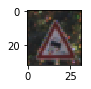

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze() # squeeze is used to delete to single dimension, e.x. (1,10)->10

unique, counts = np.unique(y_train, return_counts=True)
class_dict = dict(zip(unique, counts))
print(f'count of each sign: {class_dict}')

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# balance the training data

In [6]:
def preProcess(x):
    # convert to grayscale
    x_gray = np.dot(x[...,:3], [0.299, 0.587, 0.114])
    x_gray = np.expand_dims(x_gray, axis=3)
    
    # normalize data
    x_norm = (x_gray - 128) / 128
    return x_norm

In [7]:
X_train_norm = preProcess(X_train)
X_valid_norm = preProcess(X_valid)
X_test_norm = preProcess(X_test)

In [8]:
# shuffle the training data
from sklearn.utils import shuffle
X_train_norm, y_train = shuffle(X_train_norm, y_train)

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

EPOCHS = 50
BATCH_SIZE = 64
dropout = 0.75  # Dropout, probability to keep units

### Implement LeNet-5
#### Input
The LeNet architecture accepts a 32x32x3 image as input.
#### Architecture
**Layer 1: Convolutional.** Input = 32x32x1. Output = 28x28x30.

**Activation.** Activation relu.

**Pooling.** Input = 28x28x30. Output = 14x14x30.

**Layer 2: Convolutional.** Output = 10x10x60.

**Activation.** Activation relu.

**Pooling.** Input = 10x10x60. Output = 5x5x60.

**Flatten.** Input = 5x5x60. Output = 1500.

**Layer 3: Fully Connected.** Fully Connected. Input = 1500. Output = 300.

**Activation.** Activation relu.

**Dropout.** dropout = 0.75

**Layer 4: Fully Connected.** Input = 300. Output = 150.

**Activation.** Activation relu.

**Dropout.** dropout = 0.75

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.
#### Output
Return the result of the 2nd fully connected layer.

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x30.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 30), mean = mu, stddev = sigma)) # (32-5)/1+1 = 28
    conv1_b = tf.Variable(tf.zeros(30))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x30. Output = 14x14x30.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID') # (28-2)/2+1 = 14

    # Layer 2: Convolutional. Output = 10x10x60.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 30, 60), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(60))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x60. Output = 5x5x60.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x60. Output = 1500.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1500. Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1500, 300), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(300))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Layer 4: Fully Connected. Input = 300. Output = 150.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(300, 150), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(150))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, dropout)
    
    # Layer 5: Fully Connected. Input = 150. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(150, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

**input image and labels placeholder**

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


**training pipeline**

In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits) # error between logits and labels
loss_operation = tf.reduce_mean(cross_entropy) # average the cross entropy (cost function)
optimizer = tf.train.AdamOptimizer(learning_rate = rate) # similar as gradient decent, to minimize cost function 
training_operation = optimizer.minimize(loss_operation) # use BP to update network and minimize the training loss

**model evaluation**

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) # meature the prediction is correct by compare 
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

**train the model**

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    test_accuracy = evaluate(X_test_norm, y_test)
    print('Test Accuracy: {:.3f}'.format(test_accuracy))
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.851

EPOCH 2 ...
Validation Accuracy = 0.895

EPOCH 3 ...
Validation Accuracy = 0.924

EPOCH 4 ...
Validation Accuracy = 0.933

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.923

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.937

EPOCH 11 ...
Validation Accuracy = 0.941

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.941

EPOCH 14 ...
Validation Accuracy = 0.948

EPOCH 15 ...
Validation Accuracy = 0.943

EPOCH 16 ...
Validation Accuracy = 0.937

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.945

EPOCH 21 ...
Validation Accuracy = 0.943

EPOCH 22 ...
Validation Accuracy = 0.942

EPOCH 23 ...
Validation Accuracy = 0.956

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [16]:
import os
import cv2
DIR = 'online_image'

test_img = []
label_dict = {'roadwork.jpg':25, 'sp30.jpg':1, 'sp70.jpg':4, 'Stop.jpg':14, 'yield.jpg':13}
label = []
for file in os.listdir(DIR):
    path = os.path.join(DIR,file)
    img = cv2.imread(path)
    img = cv2.resize(img,(32,32))
    #BGR to RGB
    img = img[...,::-1]
    print(f'{file} shape is: {img.shape}')
    test_img.append(img)
    label.append(label_dict[file])
test_img = np.array(test_img)
label = np.array(label)

sp70.jpg shape is: (32, 32, 3)
roadwork.jpg shape is: (32, 32, 3)
yield.jpg shape is: (32, 32, 3)
sp30.jpg shape is: (32, 32, 3)
Stop.jpg shape is: (32, 32, 3)


4


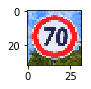

In [17]:
# randomly plot one image
index = random.randint(0, len(test_img)-1)
image = test_img[index].squeeze() # squeeze is used to delete to single dimension, e.x. (1,10)->10
plt.figure(figsize=(1,1))
plt.imshow(image)
print(label[index])

### Pre-Process

In [18]:
img_norm = preProcess(test_img)
print(f'traing set shape: {img_norm.shape}')
assert img_norm.shape == (5, 32, 32, 1), 'traing set shape are incorrect, should be (5, 32, 32, 1).'

traing set shape: (5, 32, 32, 1)


### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [20]:
prediction = tf.argmax( logits, 1 )
# Launch the graph
with tf.Session() as sess: 
    saver.restore(sess, './lenet')
    output = sess.run(prediction, feed_dict={
        x: img_norm})

print("Output classes:")
print("Expected: \n\
       25 (roadwork), \n\
       1 (speed limit 30), \n\
       4 (speed limit 70), \n\
       14 (stop sign), \n\
       13 (yield sign)")
print('Actual:')
print(output)

INFO:tensorflow:Restoring parameters from ./lenet
Output classes:
Expected: 
       25 (roadwork), 
       1 (speed limit 30), 
       4 (speed limit 70), 
       14 (stop sign), 
       13 (yield sign)
Actual:
[ 4 25 13 40 14]


In [26]:
with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    accuracy = sess.run(accuracy_operation, feed_dict={
            x: img_norm, 
            y: label})
    print(f'Accuracy: {accuracy}')

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy: 0.800000011920929


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
top_k_getter = tf.nn.top_k(tf.nn.softmax(logits),5)
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    output = sess.run(top_k_getter, feed_dict={
        x: img_norm})
    print(output)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   8.30316971e-09,   6.51743193e-09,
          4.52237414e-11,   3.66450880e-12],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.08385723e-14,   6.83437864e-17,
          1.02109006e-29,   9.03987054e-30],
       [  9.99936342e-01,   5.82756074e-05,   2.42835654e-06,
          1.87486773e-06,   9.08689572e-07]], dtype=float32), indices=array([[ 4,  0,  1,  2,  3],
       [25, 31, 38, 10, 23],
       [13,  0,  1,  2,  3],
       [40, 18, 38, 17, 37],
       [14,  3, 36, 33, 34]], dtype=int32))
